In [1]:
#https://drive.google.com/file/d/1flXzF0okFR9LTPGha-RHSUdCXPRPtZlb/view?usp=sharing
#https://drive.google.com/file/d/13xna0bU6LCb0ALAJMgKGM97bAmzwRY2k/view?usp=sharing
import cv2 

import matplotlib.pyplot as plt
import numpy as np

FILEID = "1flXzF0okFR9LTPGha-RHSUdCXPRPtZlb"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O imagen.png && rm -rf /tmp/cookies.txt

FILEID = "1oSq0t0SgIDGwJzhuZ368tDGwkTbEHJzT"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O imagen.jpg && rm -rf /tmp/cookies.txt

FILEID = "13xna0bU6LCb0ALAJMgKGM97bAmzwRY2k"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O imagenhsv.png && rm -rf /tmp/cookies.txt



--2022-05-23 04:04:14--  https://docs.google.com/uc?export=download&confirm=&id=1flXzF0okFR9LTPGha-RHSUdCXPRPtZlb
Resolving docs.google.com (docs.google.com)... 108.177.112.102, 108.177.112.139, 108.177.112.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.112.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jcsns05334c33v7r1tl0aqmdcrghf9fe/1653278625000/02377704674902172911/*/1flXzF0okFR9LTPGha-RHSUdCXPRPtZlb?e=download [following]
--2022-05-23 04:04:14--  https://doc-0g-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jcsns05334c33v7r1tl0aqmdcrghf9fe/1653278625000/02377704674902172911/*/1flXzF0okFR9LTPGha-RHSUdCXPRPtZlb?e=download
Resolving doc-0g-7c-docs.googleusercontent.com (doc-0g-7c-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to doc-0g-7c-docs.googleusercontent.com (doc-0

#1. ESPACIO DE COLOR CMYK

El modelo CMYK (acrónimo de Cyan, Magenta, Yellow y Key) es un modelo de color sustractivo que se utiliza en la impresión en colores. Los colores que se ven son la parte de luz que no es absorbida.

CMYK describe qué clase de tinta necesita aplicarse para que la luz reflejada desde el sustrato y a través de la tinta produzca un color determinado. Se empieza con un sustrato blanco (lienzo, página, etc.), y se utiliza la tinta para sustraer el color del blanco para crear una imagen.

En el modelo CMY, magenta más amarillo produce rojo, magenta más cian producen azul, cian más amarillo generan verde y la combinación de cian, magenta y amarillo forman negro.

Hay muchos espacios de color CMYK para diferentes conjuntos de tintas, sustratos, etc. (los cuales cambian la ganancia del punto o la función de transferencia para cada tinta y, de esa forma, cambiar la apariencia).

Su uso generalizado se da en el contexto de las artes gráficas. Las imprentas offset imprimen, generalmente, en estos 4 colores más tintas planas especiales, si se diera el caso (los comúnmente denominados colores Pantone). Es por esto, que antes de enviar cualquier trabajo a la imprenta deberemos convertir los colores del documento a CMYK para que los colores de impresión sean lo más correctos posibles. 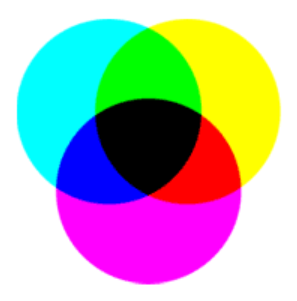

In [2]:
path_image = 'imagen.jpg'
img = cv2.imread(path_image)
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

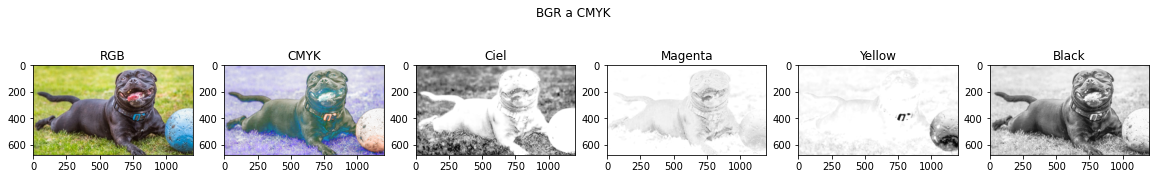

In [3]:
# Create float
bgr = img.astype(float)/255.

# Extract channels
with np.errstate(invalid='ignore', divide='ignore'):
	K = 1 - np.max(bgr, axis=2)
	C = (1-bgr[...,2] - K)/(1-K)
	M = (1-bgr[...,1] - K)/(1-K)
	Y = (1-bgr[...,0] - K)/(1-K)

# Convert the input BGR image to CMYK colorspace
CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

# Split CMYK channels
Y, M, C, K = cv2.split(CMYK)


fig = plt.figure(figsize=(20,3))

ax_0 = fig.add_subplot(161)
plt.imshow(imgrgb)
plt.title('RGB')

ax_1 =fig.add_subplot(162)
plt.imshow(CMYK, cmap ='Greys')
plt.title('CMYK')

ax_2 = fig.add_subplot(163)
plt.imshow(C, cmap ='Greys')
plt.title('Ciel')

ax_3=fig.add_subplot(164)
plt.imshow(M, cmap ='Greys')
plt.title('Magenta')

ax_4=fig.add_subplot(165)
plt.imshow(Y, cmap ='Greys')
plt.title('Yellow')

ax_5 = fig.add_subplot(166)
plt.imshow(K, cmap ='Greys')
plt.title('Black')

fig.suptitle("BGR a CMYK")
plt.show()


#TRANSFORMACION DEL ESPACIO DE COLOR RGB A HSV

Espacio de color HSV. Representación tridimensional del color basado en los componentes de tinte, matiz o tonalidad (hue, en inglés), saturación (saturation) y brillo o valor (value).

Fue definido en 1978 por Alvy Ray Smith.

A diferencia del modelo RGB ampliamente usado en los monitores, televisores, etc., si bien las coordenadas de aquel son euclideanas; el color HSV sigue una representación más parecida a las coordenadas cilíndricas. Además es una representación más cercana a la forma en que los humanos perciben los colores y sus propiedades, pues se agrupan las tonalidades de color, lo cual es distinto al caso RGB donde los colores no están necesariamente tan agrupados. 

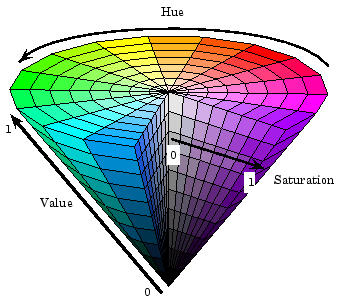

In [4]:
def RGB2HSV(img):
    """
    Convert from RGB color space to HSV color space 

    Parameters
        img: np.ndarray
    Returns 
        new_img: np.ndarray 
    """


    img = img.astype(np.float32)
    img = img/255.
    new_img = np.zeros_like(img)
    maxChannel = np.argmax(img,axis=2)
    maxValue = np.amax(img,axis=2)
    minChannel = np.argmin(img,axis=2)
    minValue = np.amin(img,axis=2)

    #value 
    new_img[...,2] = maxValue

    #saturation
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if maxValue[i,j]==0:
                new_img[i,j,1] = 0
            elif maxValue[i,j] != 0:
                new_img[i,j,1] = (new_img[i,j,2]-minValue[i,j])/new_img[i,j,2]

    #hue 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if sum(img[i,j,...])/3 == img[i,j,0]:
                new_img[i,j,0] = 0
            elif maxChannel[i,j] == 0: #R 
                new_img[i,j,0] = 60 * ((img[i,j,1]-img[i,j,2])/(new_img[i,j,2]-minValue[i,j]))
            elif maxChannel[i,j] == 1: #G
                new_img[i,j,0] = 120 + 60 * (img[i,j,2]-img[i,j,0])/(new_img[i,j,2]-minValue[i,j])
            elif maxChannel[i,j] == 2: #B
                new_img[i,j,0] = 240 + 60 * (img[i,j,0]-img[i,j,1])/(new_img[i,j,2]-minValue[i,j])
            

        bol_ind = new_img[...,0] < 0
        new_img[bol_ind,0]   =  new_img[bol_ind,0] + 360
    return new_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


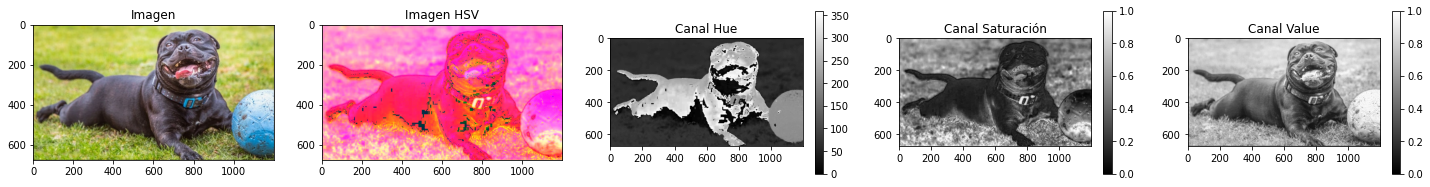

In [5]:
imgrgb = np.array(imgrgb)
hsv_img =  RGB2HSV(imgrgb) 

fig, axs = plt.subplots(1,5,figsize=(25,10))

axs[0].imshow(imgrgb)
axs[0].set_title('Imagen')

axs[1].imshow(hsv_img, cmap='gray')
axs[1].set_title('Imagen HSV')


fig_img = axs[2].imshow(hsv_img[...,0],cmap='gray',vmin=0,vmax=360)
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Hue')


fig_img = axs[3].imshow(hsv_img[...,1],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Saturación')


fig_img = axs[4].imshow(hsv_img[...,2],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[4],shrink=0.3)
axs[4].set_title('Canal Value');

In [6]:
hsv_img.shape

(675, 1200, 3)

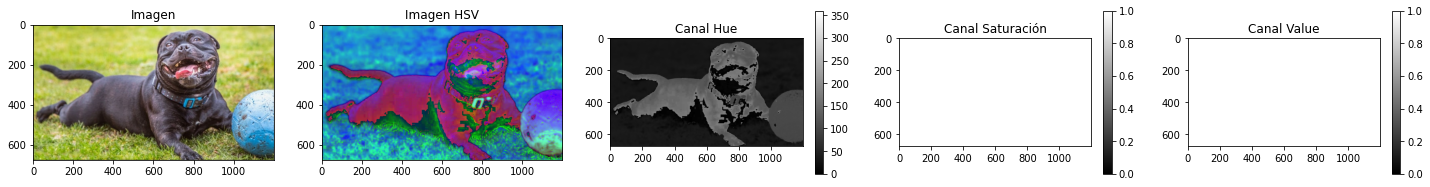

In [7]:
hsv_img_cv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
fig, axs = plt.subplots(1,5,figsize=(25,10))

axs[0].imshow(imgrgb)
axs[0].set_title('Imagen')

axs[1].imshow(hsv_img_cv, cmap='gray')
axs[1].set_title('Imagen HSV')


fig_img = axs[2].imshow(hsv_img_cv[...,0],cmap='gray',vmin=0,vmax=360)
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Hue')


fig_img = axs[3].imshow(hsv_img_cv[...,1],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Saturación')


fig_img = axs[4].imshow(hsv_img_cv[...,2],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[4],shrink=0.3)
axs[4].set_title('Canal Value');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


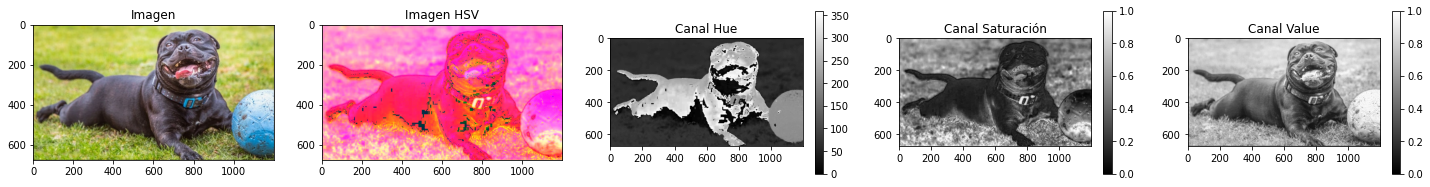

In [8]:
imgrgb = np.array(imgrgb)
hsv_img =  RGB2HSV(imgrgb) 

fig, axs = plt.subplots(1,5,figsize=(25,10))

axs[0].imshow(imgrgb)
axs[0].set_title('Imagen')

axs[1].imshow(hsv_img, cmap='gray')
axs[1].set_title('Imagen HSV')


fig_img = axs[2].imshow(hsv_img[...,0],cmap='gray',vmin=0,vmax=360)
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Hue')


fig_img = axs[3].imshow(hsv_img[...,1],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Saturación')


fig_img = axs[4].imshow(hsv_img[...,2],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[4],shrink=0.3)
axs[4].set_title('Canal Value');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


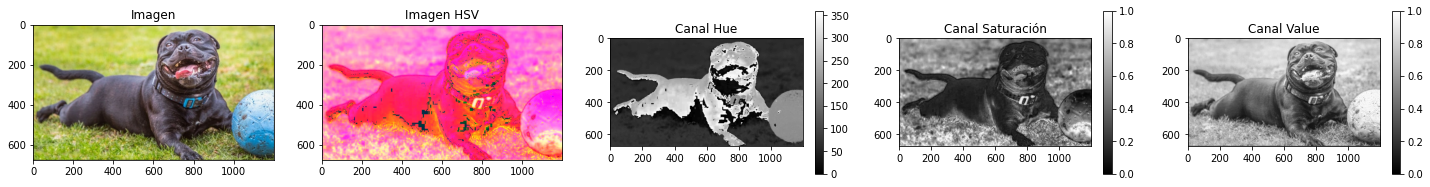

In [9]:
imgrgb = np.array(imgrgb)
hsv_img =  RGB2HSV(imgrgb) 

fig, axs = plt.subplots(1,5,figsize=(25,10))

axs[0].imshow(imgrgb)
axs[0].set_title('Imagen')

axs[1].imshow(hsv_img, cmap='gray')
axs[1].set_title('Imagen HSV')


fig_img = axs[2].imshow(hsv_img[...,0],cmap='gray',vmin=0,vmax=360)
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Hue')


fig_img = axs[3].imshow(hsv_img[...,1],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Saturación')


fig_img = axs[4].imshow(hsv_img[...,2],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[4],shrink=0.3)
axs[4].set_title('Canal Value');